In [1]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [6]:
X

array([[0.24236239],
       [0.6982764 ],
       [0.95822801],
       [0.54461143],
       [1.11889277],
       [0.31709127],
       [0.69279101],
       [0.06462912],
       [0.5248869 ],
       [0.38949632],
       [1.25476133],
       [0.68567033],
       [1.04208427],
       [1.29371283],
       [1.92596362],
       [0.0021924 ],
       [0.9671563 ],
       [1.36163987],
       [0.31580062],
       [0.63852939],
       [1.37129356],
       [1.42143691],
       [0.96597133],
       [1.61165855],
       [0.87195351],
       [1.73007585],
       [0.11695755],
       [1.73314315],
       [0.82409946],
       [0.3137137 ],
       [0.65626201],
       [0.88693895],
       [0.42011104],
       [1.52177034],
       [0.61901636],
       [0.29398886],
       [1.2017246 ],
       [0.23216956],
       [1.58380406],
       [0.8562733 ],
       [0.60334667],
       [0.94907297],
       [1.14754797],
       [1.07992461],
       [1.62596704],
       [0.21673404],
       [1.47538531],
       [0.901

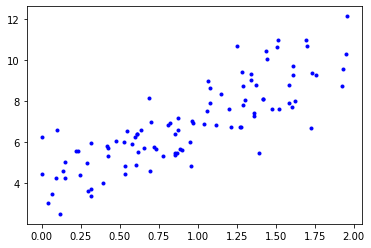

In [7]:
import matplotlib.pyplot as plt

plt.plot(X, y,'b.')
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("y", rotation=0, fontsize=18)
#plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

In [8]:
X_b=np.c_[np.ones((100,1)),X]  # add x0 = 1 to each instance
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 0.24236239],
       [1.        , 0.6982764 ],
       [1.        , 0.95822801],
       [1.        , 0.54461143],
       [1.        , 1.11889277],
       [1.        , 0.31709127],
       [1.        , 0.69279101],
       [1.        , 0.06462912],
       [1.        , 0.5248869 ],
       [1.        , 0.38949632],
       [1.        , 1.25476133],
       [1.        , 0.68567033],
       [1.        , 1.04208427],
       [1.        , 1.29371283],
       [1.        , 1.92596362],
       [1.        , 0.0021924 ],
       [1.        , 0.9671563 ],
       [1.        , 1.36163987],
       [1.        , 0.31580062],
       [1.        , 0.63852939],
       [1.        , 1.37129356],
       [1.        , 1.42143691],
       [1.        , 0.96597133],
       [1.        , 1.61165855],
       [1.        , 0.87195351],
       [1.        , 1.73007585],
       [1.        , 0.11695755],
       [1.        , 1.73314315],
       [1.        , 0.82409946],
       [1.        , 0.3137137 ],
       [1.

In [23]:
len(X_b)

100

In [9]:
theta_best

array([[3.90917953],
       [3.16863309]])

In [10]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.90917953],
       [10.24644571]])

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90917953]), array([[3.16863309]]))

In [12]:
yhat = lin_reg.predict(X_new)
yhat

array([[ 3.90917953],
       [10.24644571]])

In [13]:
#梯度下降，底层代码
eta=0.1 # learning rate
n_iterations=10
m=100
theta=np.random.randn(2,1) # random initialization

for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients
    
y_gd = X_new_b.dot(theta)
y_gd

array([[ 3.17014248],
       [10.76892125]])

<function matplotlib.pyplot.show(*args, **kw)>

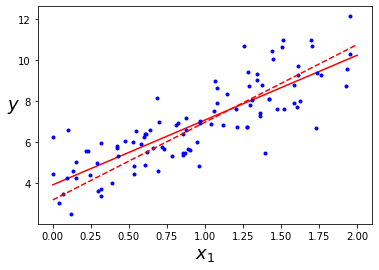

In [14]:
#红色实线表示由正规方程计算得到的直线
plt.plot(X_new,y_predict,"r-")#新X和预测y形成两个点，唯一确定一条直线，即训练出来的线性模型
plt.plot(X,y,"b.")
#红色虚线表示用梯度下降迭代10次得到的直线
plt.plot(X_new,y_gd,"r--")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show

In [15]:
theta_path_bgd = [] #暂时不用，等显示参数路径时会用到

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) #在这里是100
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: #只画10条线要不然太挤了
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--" #令初始位置为红色虚线
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

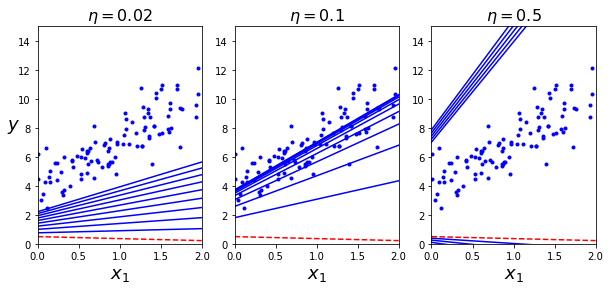

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 随机初始化theta值

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

#save_fig("gradient_descent_plot")
plt.show()

In [17]:
k = X_b[1]
k.dot(theta)

array([0.40016745])

In [18]:
j = X_b[1:2]
j.dot(theta)

array([[0.40016745]])

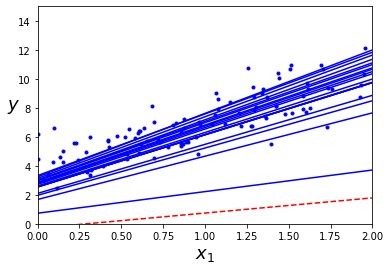

In [21]:
theta_path_sgd = []

n_epochs=50
t0,t1=5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)# randominitialization

for epoch in range(n_epochs):
    for i in range(100):
        if epoch == 0 and i < 20:               # not shown in the book
            y_predict = X_new_b.dot(theta)      # not shown
            style = "b-" if i > 0 else "r--"    # not shown
            plt.plot(X_new, y_predict, style)   # not shown
        random_index=np.random.randint(100)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)                 # not shown
        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [3]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

NameError: name 'X' is not defined

In [45]:
#为绘制参数路径图做准备
#提取每次迭代得到的theta_0，形成列表，作为横坐标

tmp = []
listx = []

for i in range(len(theta_path_sgd)):
    tmp.append(theta_path_sgd[i][0])
for a in tmp:
    a = a[0]
    listx.append(a)

listx

[0.7308617942860364,
 1.6768999840652512,
 1.9657873700354953,
 2.098762992192856,
 2.7888569706684168,
 2.7177614910306116,
 2.6112055352050056,
 2.550263318851951,
 2.542974207996627,
 2.541387491470258,
 2.5487433666227743,
 2.8261071021081197,
 2.86923692873777,
 3.026198564730522,
 2.9753928925375246,
 3.2366566666421277,
 3.0020374485997787,
 3.1314863377125466,
 3.325162360015312,
 3.305287055347466,
 3.060666718467209,
 2.9597325305837923,
 3.062415202806399,
 3.1683588515103223,
 3.157807848402809,
 3.060698384698801,
 2.9834502356792454,
 3.2247152754808646,
 3.324340463128083,
 3.2061353978457277,
 3.293001075173951,
 3.1455330874520526,
 3.139142101475232,
 3.2272795265541463,
 3.1555372563456814,
 3.260555127754668,
 3.037005886516118,
 3.109914265445928,
 3.0768271181068134,
 3.2605902036681984,
 3.1824401332769083,
 3.2386127605133357,
 3.2363573275896838,
 3.3357251453443775,
 3.382698804586785,
 3.0301469732178528,
 2.975670567122855,
 3.042665349566692,
 2.97444469319

In [48]:
tmp =[]
tmp

[]

In [50]:
tmp = []
listy = []

for i in range(len(theta_path_sgd)):
    tmp.append(theta_path_sgd[i][1])
for a in tmp:
    a = a[0]
    listy.append(a)

listy

[1.4896171596953889,
 2.9879562871693603,
 3.262131497463285,
 3.381992698749864,
 3.8551696647592344,
 3.817404773768739,
 3.688222730532182,
 3.6052413790497564,
 3.5995513605776277,
 3.598708519697217,
 3.601041003467252,
 3.9193291957839556,
 3.946027263912637,
 4.040362850284855,
 4.0031574885260826,
 4.378812964465901,
 4.1752197286119195,
 4.2538714081416105,
 4.254296023599593,
 4.253011500092987,
 3.956448490634131,
 3.9028337091874006,
 3.9856995844766745,
 4.016160463608145,
 4.009236241068509,
 3.971412461983056,
 3.8615934099606863,
 4.225067610783366,
 4.3531369374576805,
 4.19871154204783,
 4.254177829623298,
 4.089176964465518,
 4.083003455234163,
 4.129265634668805,
 4.091156502531912,
 4.269111643437344,
 3.837222951305583,
 3.8796309891594642,
 3.8554010314956577,
 3.8952287469732227,
 3.7841433526289414,
 3.79258436013836,
 3.792438593486909,
 3.8558878651077713,
 3.906428677453472,
 3.4144026563471024,
 3.328122703108274,
 3.408631981535885,
 3.3217864112040902,
 3

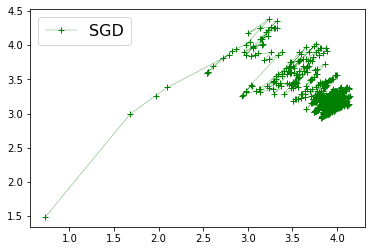

In [52]:
plt.plot(listx, listy, "g-+", linewidth=0.3, label="SGD")
plt.legend(loc="upper left", fontsize=16)
plt.show()

In [2]:
import numpy as np

a = np.linspace(1,2,11)
a

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [3]:
b = np.linspace(1,3,21)
b

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [5]:
c,d = np.meshgrid(a,b)
c #所有格点的横坐标（从左到右、从下往上数）

array([[1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
       [1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.

In [6]:
d #所有格点的纵坐标（从左到右、从下往上数）

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3],
       [1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4],
       [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
       [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6],
       [1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7],
       [1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8],
       [1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ],
       [2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1],
       [2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2],
       [2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3],
       [2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4],
       [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.

In [2]:
import numpy as np

from sklearn import datasets


In [3]:
iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.filename

'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [6]:
iris.data[:,3]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [7]:
iris.data[:,3:]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [8]:
a = iris.data[:,3]
np.shape(a)

(150,)

In [9]:
b = iris.data[:,3:]
np.shape(b)

(150, 1)

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
tmp = (iris.target==2)

In [5]:
tmp

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
y=tmp.astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X = iris.data[:,3:]

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [20]:
X[y==0]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [21]:
y[y==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
import matplotlib.pyplot as plt

In [9]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

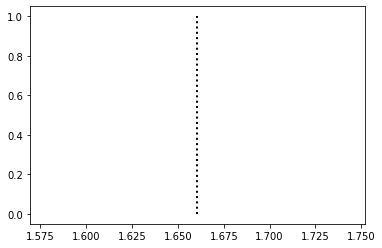

In [10]:
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)

In [10]:
X = iris["data"][:, (2, 3)] 
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [20]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500),
        np.linspace(0.8, 2.7, 200)
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [13]:
x0

array([[2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ],
       [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ],
       [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ],
       ...,
       [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ],
       [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ],
       [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
        7.        ]])

In [33]:
x1

array([[0.8       , 0.8       , 0.8       , ..., 0.8       , 0.8       ,
        0.8       ],
       [0.80954774, 0.80954774, 0.80954774, ..., 0.80954774, 0.80954774,
        0.80954774],
       [0.81909548, 0.81909548, 0.81909548, ..., 0.81909548, 0.81909548,
        0.81909548],
       ...,
       [2.68090452, 2.68090452, 2.68090452, ..., 2.68090452, 2.68090452,
        2.68090452],
       [2.69045226, 2.69045226, 2.69045226, ..., 2.69045226, 2.69045226,
        2.69045226],
       [2.7       , 2.7       , 2.7       , ..., 2.7       , 2.7       ,
        2.7       ]])

In [17]:
x0.ravel()

array([2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
       7.        ])

In [21]:
y_proba = log_reg.predict_proba(X_new)

ValueError: X has 2 features per sample; expecting 1

In [15]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[2.9, 7, 0.8, 2.7]

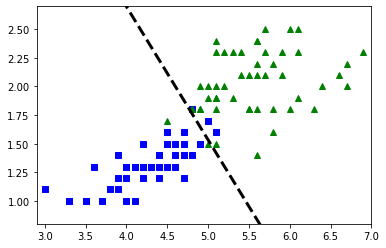

In [23]:
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0])/log_reg.coef_[0][1] #这里这条分界线没搞出来
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.axis([2.9, 7, 0.8, 2.7])

In [16]:
log_reg.coef_

array([[2.77762524, 2.38552012]])

In [23]:
log_reg.coef_[0][0] * left_right

array([12.56594533, 30.33159218])

In [17]:
log_reg.intercept_

array([-17.5481106])

In [20]:
log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]

array([-9.49299741,  1.89526606])